In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline

data = pd.read_csv('https://richardson.byu.edu/220/possum.csv')
data.dropna(inplace=True)

In [2]:
data.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
data.tail()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [4]:
print("Shape of the dataset:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nBasic Statistics:\n", data.describe())
print("\nCorrelation Matrix:\n", data.corr())


Shape of the dataset: (101, 10)

Data Types:
 age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

Missing Values:
 age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Basic Statistics:
               age     hdlngth      skullw    totlngth       taill    footlgth  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     3.821782   92.730693   56.960396   87.269307   37.049505   68.398020   
std      1.915182    3.518714    3.102679    4.196802    1.971681    4.413502   
min      1.000000   82.500000   50.000000   75.000000   32.000000   60.300000   
25%      2.000000   90.700000   55.000000   84.500000   36.000000   64.500000   
50%      3.000000   92.900000   56.400000   88.000000   37.0000

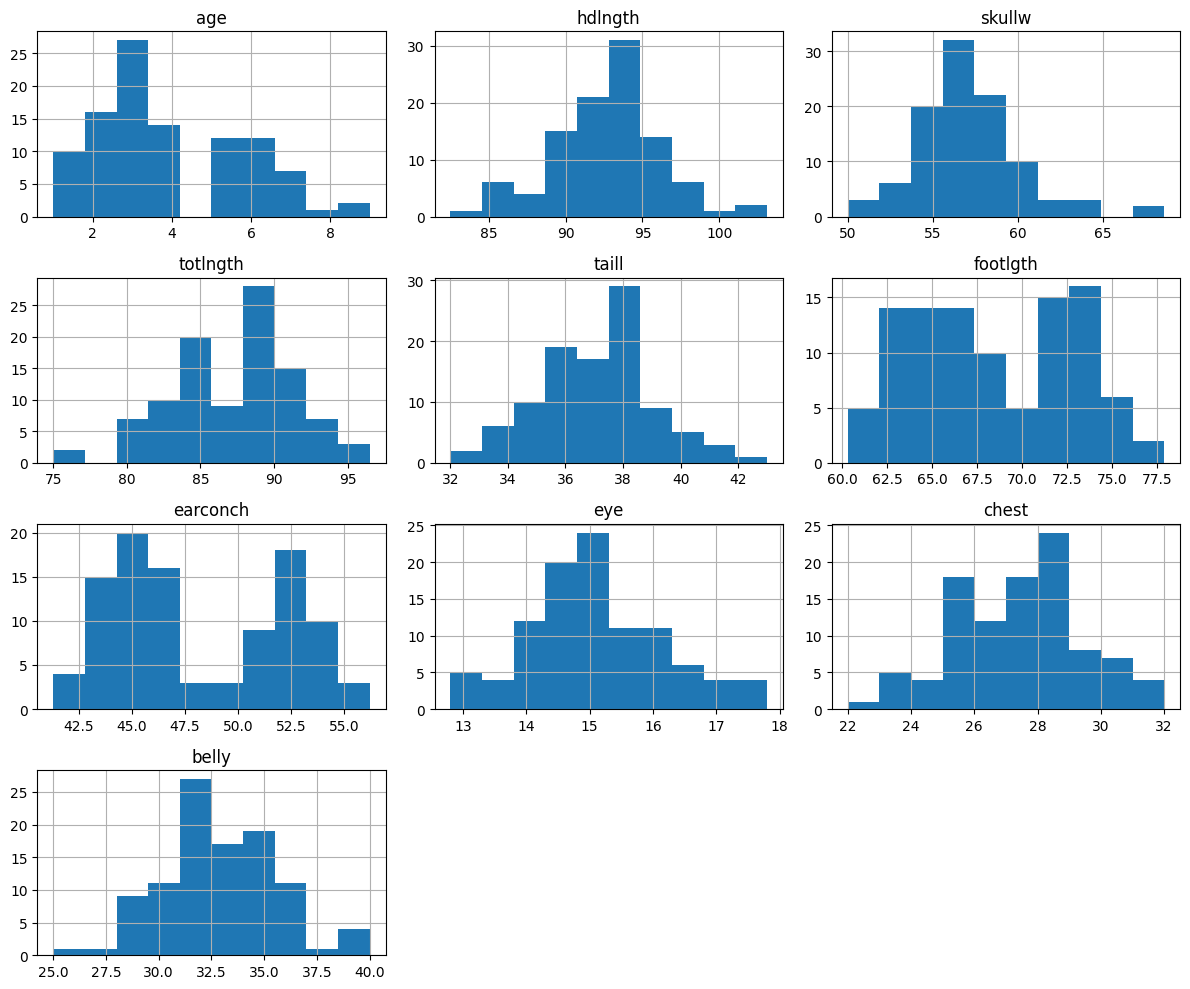

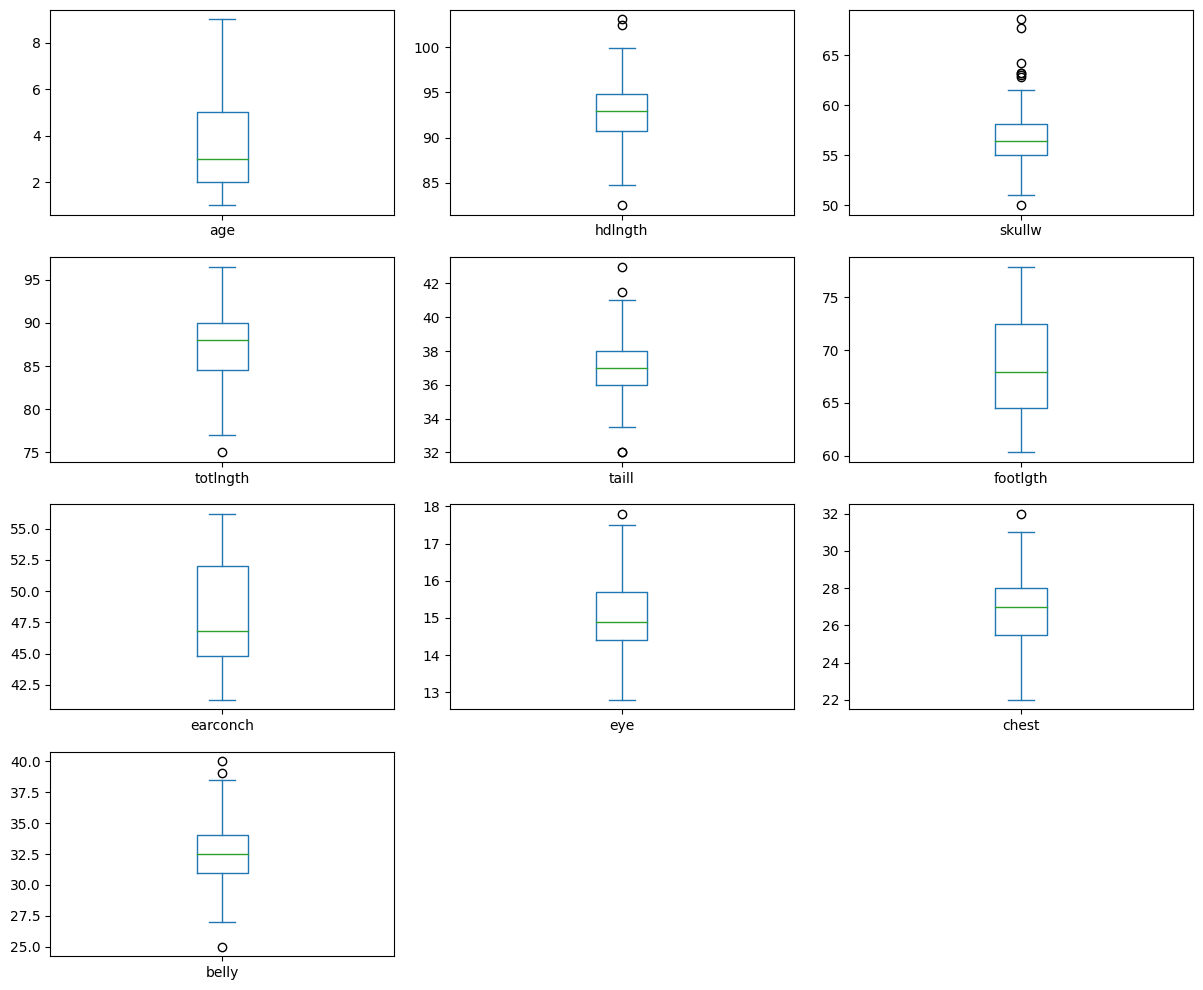

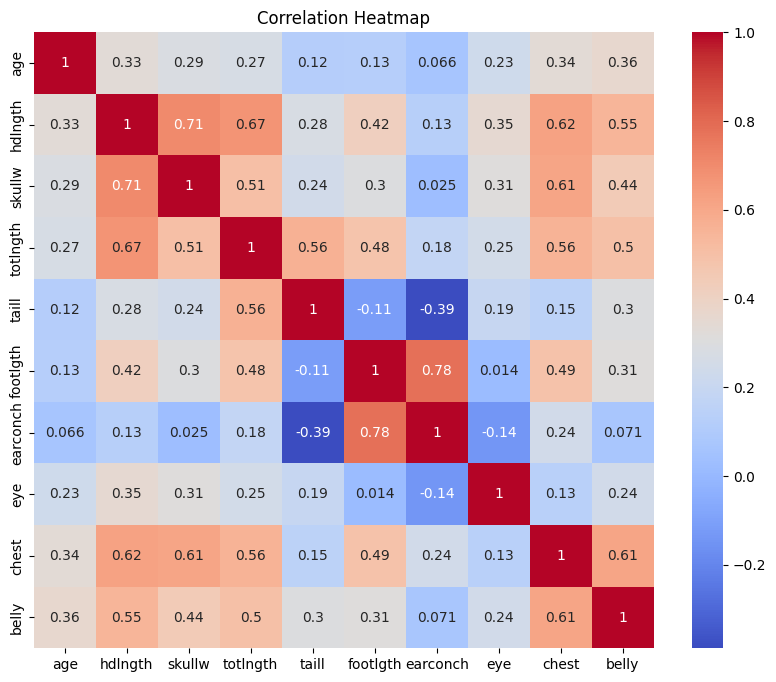

In [5]:
# Histograms
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots
data.plot(kind='box', subplots=True, layout=(4,3), figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
X = data.drop('age', axis=1)
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initial Model
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

#MultiCheck
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

R-squared: 0.023158045952155204
MSE: 4.416831873858056
    feature          VIF
0   hdlngth  1731.517643
1    skullw   794.476945
2  totlngth  1518.175505
3     taill   596.202275
4  footlgth  1005.910815
5  earconch   429.677469
6       eye   243.994381
7     chest   458.655424
8     belly   262.625852


In [7]:
#Refine Model
X_train_sm = sm.add_constant(X_train)  # adding a constant for statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     2.357
Date:                Fri, 10 Nov 2023   Prob (F-statistic):             0.0218
Time:                        05:19:25   Log-Likelihood:                -151.79
No. Observations:                  80   AIC:                             323.6
Df Residuals:                      70   BIC:                             347.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0610      6.640     -1.967      0.0

In [8]:
#polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#standardize features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

#grid Search for Ridge
ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_poly_scaled, y_train)
print(f"Best Ridge Parameters: {ridge_regressor.best_params_}")
print(f"Best Ridge MSE: {-ridge_regressor.best_score_}")

#different algos
rf = RandomForestRegressor(random_state=42)
rf_parameters = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_regressor = GridSearchCV(rf, rf_parameters, scoring='neg_mean_squared_error', cv=5)
rf_regressor.fit(X_train, y_train)

#forest model
print(f"Best Random Forest Parameters: {rf_regressor.best_params_}")
print(f"Best Random Forest MSE: {-rf_regressor.best_score_}")

#lasso
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.01, max_iter=10000)) #increased iterations for better results
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
print("Lasso R-squared:", r2_score(y_test, y_pred_lasso))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))

Best Ridge Parameters: {'alpha': 100}
Best Ridge MSE: 3.457512400342736
Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 100}
Best Random Forest MSE: 2.87583375
Lasso R-squared: 0.043191795367857666
Lasso MSE: 4.326248435456898


In [9]:
#LOG TRANSFORMATIONS

data['log_age'] = np.log(data['age'] + 1)
y = data['log_age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#standardize features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

#grid Search for Ridge
ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_poly_scaled, y_train)
print(f"Best Ridge Parameters: {ridge_regressor.best_params_}")
print(f"Best Ridge MSE: {-ridge_regressor.best_score_}")

#forest
rf = RandomForestRegressor(random_state=42)
rf_parameters = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_regressor = GridSearchCV(rf, rf_parameters, scoring='neg_mean_squared_error', cv=5)
rf_regressor.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rf_regressor.best_params_}")
print(f"Best Random Forest MSE: {-rf_regressor.best_score_}")

#lasso
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.01, max_iter=10000))
lasso.fit(X_train_poly_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_poly_scaled)
print("Lasso R-squared:", r2_score(y_test, y_pred_lasso))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))


Best Ridge Parameters: {'alpha': 100}
Best Ridge MSE: 0.1553435597676896
Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Random Forest MSE: 0.12619656949956654
Lasso R-squared: 0.10552408962172355
Lasso MSE: 0.16888707808392867


# Recommendation and best model justification

Result Summary:
- OLS Regression:
  - R-squared: 0.233
  - Adjusted R-squared: 0.134
  - F-statistic: 2.357
  
- Ridge Regression:
  - Best parameters found: alpha = 100
  - Best MSE (before log): 3.457512400342736
  - Best MSE (after log): 0.1553435597676896

- Random Forest:
  - Best parameters (before log): depth = None and n_estimators = 100
  - Best MSE (before log): 2.87583375
  - Best parameters (after log): depth = 10 and n_estimators = 100
  - Best MSE (after log): 0.12619656949956654

- Lasso Regression:
  - R-squared (before log): 0.043191795367857666
  - MSE (before log): 4.326248435456898
  - R-squared (after log): 0.10552408962172355
  - MSE (after log): 0.16888707808392867


The Random Forest model remains the top recommendation due to its consistently lowest MSE, signaling the most accurate predictions. The improvement in MSE for both Ridge and Lasso Regression, however, makes them strong alternatives, especially where interpretability is a key consideration.

In conclusion, the log transformation has proved to be highly effective in refining the models, with the Random Forest model standing out as the best choice for predicting the age of possums.

